## Here goes the file which tests creating a subset (use list of dirs or something similar to pick ~1400 random clean files)

In [1]:
import numpy as np
import os
import itertools
import shutil
import pandas as pd
import forced_phot as fp

DATAPATH = r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data'
mask = [x.isnumeric() for x in os.listdir(DATAPATH)]
datadirs = np.array(os.listdir(DATAPATH))[mask]
datadirs2 = [os.path.join(DATAPATH,d) for d in datadirs]
ztfnames = [os.listdir(dir) for dir in datadirs2]
banlist = np.array(os.listdir(DATAPATH))[np.invert(mask)]

In [2]:
# for i,ddir in enumerate(datadirs2):
#     for ztfname in ztfnames[i]:
#         with open('list_of_dirs.txt','a') as f:
#                f.write(os.path.join(ddir, ztfname)+'\n')


In [3]:
def flatten_list(nested_list):
    return list(itertools.chain(*nested_list))

In [4]:
len(flatten_list(ztfnames))

14242

In [5]:
def walkdatapath(): #only run if the txt file is completely empty else you get duplicates.
   files = []
   for root, dirs, files in os.walk(DATAPATH, topdown=False):
      if np.any([d in root for d in banlist]):
         continue
      for name in files:
         if 'clean_data' in name:
            # print(os.path.join(root,name))
            with open('list_of_clean_dirs.txt','a') as f:
               f.write(os.path.join(root, name)+'\n')


In [6]:
with open('list_of_dirs.txt','r') as f:
    lines = f.readlines()

lines = np.array([l.strip('\n') for l in lines],dtype=str)
n = len(lines)
np.random.seed(42)
sample_idx = np.random.randint(0,n-1,n//10)
len(sample_idx),np.unique(sample_idx).shape

(1424, (1353,))

In [7]:
sample = lines[sample_idx]

#largely based on
#https://stackoverflow.com/questions/1868714/how-do-i-copy-an-entire-directory-of-files-into-an-existing-directory-using-pyth
#with own alterations
def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        dst_full = os.path.join(dst,os.path.split(src)[-1])
        d = os.path.join(dst_full, item)
        if os.path.isdir(dst_full):
            shutil.copy2(s, d)
        else:
            os.mkdir(dst_full)
            shutil.copy2(s, d)
        


# for i,path in enumerate(sample):
#     copytree(path,r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data\random_subset')


# # pd.read_csv(sample[0],sep='\t',comment='#',names=['time','flux','flux_unc','zeropoint','filter'])

In [8]:
sampledir = r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data\random_subset'


In [20]:
n_err = 0
for i,ztf in enumerate(os.listdir(sampledir)):
    # if i < 500:
    # print(ztf)
    try:
        ztf_obj = fp.ZTF_forced_phot(os.path.join(sampledir,ztf),ztf_name=ztf)
    except FileNotFoundError:
        shutil.rmtree(os.path.join(sampledir,ztf))

    # ztf_obj.plot_clean_unclean_data()
    # print(ztf_obj.guesses_g)
    # print(ztf_obj.boundings_g)
    try:
        ztf_obj.fit(False)
    except Exception as e:
        print(ztf)
        print(e)
        print()
        n_err += 1


print(f"THERE ARE {n_err} OUT OF {len(os.listdir(sampledir))} INSTANCES WHICH DIDN'T WORK")





ZTF18aaaqlci
Optimal parameters not found: The maximum number of function evaluations is exceeded.

ZTF18aagrhdb
Optimal parameters not found: The maximum number of function evaluations is exceeded.

ZTF18aajsypz
Optimal parameters not found: The maximum number of function evaluations is exceeded.

ZTF18aatfefo
Optimal parameters not found: The maximum number of function evaluations is exceeded.

ZTF18aatybbp
Optimal parameters not found: The maximum number of function evaluations is exceeded.

ZTF18aazffjy
Optimal parameters not found: The maximum number of function evaluations is exceeded.

ZTF18abbpwzy
Optimal parameters not found: The maximum number of function evaluations is exceeded.

ZTF18absbsts
`ydata` must not be empty!

ZTF18absiecw
Optimal parameters not found: The maximum number of function evaluations is exceeded.

ZTF18abtclfv
Optimal parameters not found: The maximum number of function evaluations is exceeded.

ZTF18abtomal
`ydata` must not be empty!

ZTF18acaopar
Optim

In [21]:
# with open(r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data\random_subset\no_viable_g_or_r.txt') as delfile:
#     dellines = delfile.readlines()

# dellines = [l.strip('\n') for l in dellines]
# for ztf in os.listdir(sampledir):
#     if ztf in dellines:
#         shutil.rmtree(os.path.join(sampledir,ztf))

fringe case where cross correlation didn't work

-46.522349500097334
0 295
[-17.86785775 -19.70403172  47.55257286  58.56744647  -1.24763405
   4.15704514 -23.40844772 -24.68461443 -21.51098492 -18.27373666
 -17.73609898 -14.55558968 -20.01818188 -23.8805886  -27.68752486
 -23.06678878 -18.09744168 -14.56384096 -13.75842278 -16.76948063
 -20.46843229 102.60680508  53.12733639 -14.44340241 -12.2542881
  53.8890754   55.2587334  -19.96243987 -27.87633052 -15.84927408
 -21.38910394 -17.30728053 -15.98902329 -27.34094733 -23.66954855
 -13.88762293 -20.1990883  -19.89766305 -22.86058042 -19.0632761
 -13.74844604 -21.37423036 -15.36352372 -18.59539503 -25.2167912
 -15.35453824 -16.75970963 -16.03707225 -20.0899843  -16.67725167
 -20.66015565 -20.5166794  -19.40368791 -16.99746949 -21.75232058
 171.75042153] 5
-25.747830232574987
56.08591166914902


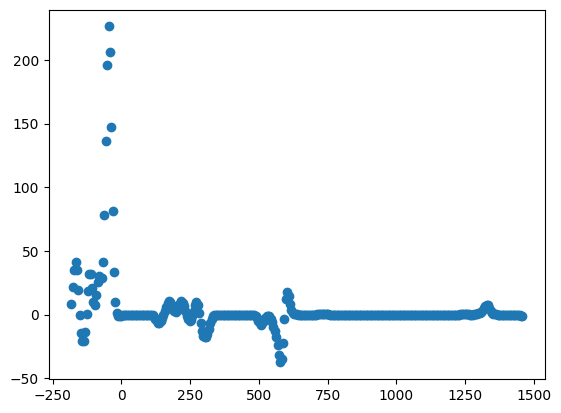

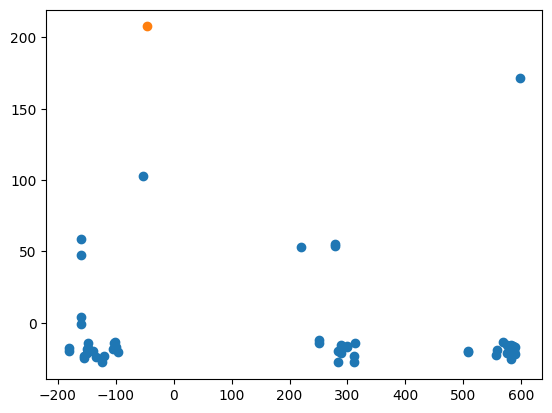

1702.2415161998942
597.3336110999808


In [23]:
clean_data = pd.read_csv(os.path.join(sampledir,'ZTF17aaaecja','ZTF17aaaecja_clean_data.txt'),sep='\t',comment='#',names=['time','flux','flux_unc','zeropoint','filter'])
clean_data.sort_values('time',inplace=True) #sort the data by time for plotting reasons later on
no_i_mask = clean_data['filter'] != 'ZTF_i' #create the ZTf_i mask to filter out ZTF-i-band data.
flux,err = fp.flux_jy(clean_data) #convert the flux and its errors to uJY
err = np.clip(err,0.01*flux,np.inf) # clip the errors to be at least 1% of the flux
clean_data['flux'] = flux.values #overwrite with new data
clean_data['flux_unc'] = err.values 
time_zeropoint = 2458484.5 #JD of 01-01-2019 @ 00:00:00.000
#transform time column
time_mjd = clean_data['time'] - time_zeropoint
clean_data['time'] = time_mjd.values 

flux, err, time = clean_data[['flux','flux_unc','time']].T.to_numpy(dtype=np.float64)
# print(time)
clean_filtermasks = [(clean_data['filter'] == 'ZTF_g'), (clean_data['filter'] == 'ZTF_r'), (clean_data['filter'] == 'ZTF_i')]
clean_filtermasks[0].sum()
# no_i_mask = np.invert(clean_filtermasks[-1])
# print(time-)
# peak_ind,t_0_guess,peak_guess = fp.cross_correlation(flux,time,2458484.5,full_output=False)
# print(time-2458484.5)
cross_corr, peak, timesteps_for_gauss, best_flux = fp.cross_correlation(flux,time,full_output=True)
# t_0_guess = 150 + 2458484.5
t_0_guess = timesteps_for_gauss[peak]
print(t_0_guess)
time_mask_pure = (clean_data['time'] > (t_0_guess - 365)) & (clean_data['time'] < (t_0_guess+365*2)) #these are the times we will be fitting on
time_mask = time_mask_pure * no_i_mask # also filter out ZTF_i measurements
print(sum(np.invert(time_mask)&clean_filtermasks[0]),len(time_mask))
# print(t_0_guess)
print(flux[clean_filtermasks[0]],5)
print(np.percentile(flux[time_mask & clean_filtermasks[0]],5))
print(np.percentile(flux[time_mask & clean_filtermasks[0]],95))
# print(np.percentile(flux[np.invert(time_mask)&clean_filtermasks[0]],5))

import matplotlib.pyplot as plt
plt.scatter(timesteps_for_gauss,cross_corr)
plt.show()
plt.scatter(time[clean_filtermasks[0]],flux[clean_filtermasks[0]])
plt.scatter(t_0_guess,best_flux)
plt.show()
print(max(time[clean_filtermasks[1]]))
print(max(time[time_mask]))